# iFood Advanced Data Analyst Case

Este notebook tem po objetivo oferecer insights baseados nos dados oferecidos pelo case do iFood




### Índice

* Introdução
  * [Objetivos](#objetivos)
  * [Dados](#dados)
* Conhecendo os Dados
  * [Reunindo as Bibliotecas](#bibliotecas)
  * [Carregando os Dados](#carregando)

<a id='objetivos'></a>
## Key Objectives and Deliverables:

1. Explore the data – be creative and pay attention to the details. You need to provide the
marketing team a better understanding of the characteristic features of
respondents; How do variables connect with response rates? What other relationships
between variables are interesting for the business? Which actionable can we take out of
the EDA?

2. Propose and describe a customer segmentation based on customers’ behaviors; How
many and which profiles are there in the database? How does segmentation connect to
the campaign's financial return?

3. Create a predictive model which allows the company to maximize the profit of the next
marketing campaign. What is the best metric that correlates with the profitability of the
campaign? Simplicity and awareness of what is going on are preferred over
implementations of complex algorithms which you don’t master.

4. Make a highly effective business presentation: Remember that the case must contain a
presentation that at the same time brings technical strength, insights and actionables,
but communicates with a non-technical audience such as a CMO. Take the audience on a
journey. Help them see the story of success and what it will bring.


## The data

#### Feature Desciption
<a id='dados'></a>

    AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response (target)-  1 if customer accepted the offer in the last campaign, 0 otherwise
    Complain - 1 if customer complained in the last 2 years
    DtCustomer - data of customer's enrollment with the company
    Education - customer's level of education
    Marital - customer's marital status
    Kidhome - number of small children in customer's household
    Teenhome - number of teenagers in customer's household
    Income - customer's yearly household income
    MntFishProducts - amount spent on fish products in the last 2 years
    MntMeatProducts - amount spent on meat products in the last 2 years
    MntFruits - amount spent on fruits products in the last 2 years
    MntSweetProducts - amount spent on sweet products in the last 2 years
    MntWines - amount spent on wines products in the last 2 years
    MntGoldProds - amount spent on gold products in the last 2 years
    NumDealsPurchases - number of purchases made with discount
    NunCatalogPurchases - number of purchases made using catalog
    NunStorePurchases - number of purchases made directly in stores
    NumWebPurchases - number of purchases made through company's web site
    NumWebVisitsMonth - number of visits to company's web site in the last month
    Recency - number of days since the last purchase


## Reunindo as Bibliotecas

In [482]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


<a id='carregando'></a>
## Carregando os Dados

In [448]:
dfCustomers = pd.read_csv('https://raw.githubusercontent.com/ifood/ifood-data-advanced-analytics-test/master/ml_project1_data.csv')

In [449]:
dfCustomers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [450]:
dfCustomers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

As colunas abaixo não estavam no dicionário de dados:
* Year_Birth
* Z_CostContact
* Z_Revenue

Utilizei o describe para verificar os conteúdos do dessas colunas

In [451]:
dfCustomers.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Analisando as colunas `Z_CostContact` e `Z_Revenue` no resultado do describe, pode-se perceber que estas possuem dados contínumos que não afetarão as análises futuras. Podendo excluí-las.

In [452]:
dfCustomers.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [453]:
dfCustomers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

**Verificando os dados faltosos**

In [454]:
dfCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [455]:
dfCostumers.isnull().sum().sort_values(ascending = False)

Response               0
MntFishProducts        0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntSweetProducts       0
Complain               0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
ID                     0
dtype: int64

**Dropando dados nulos** 

In [456]:
dfCustomersNulls = dfCustomers[dfCustomers['Income'].isnull()]
dfCustomersNulls

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


In [457]:
dfCostumers.dropna(inplace=True)
dfCostumers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2215 non-null   int64  
 1   Year_Birth           2215 non-null   int64  
 2   Education            2215 non-null   object 
 3   Marital_Status       2215 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2215 non-null   int64  
 6   Teenhome             2215 non-null   int64  
 7   Dt_Customer          2215 non-null   object 
 8   Recency              2215 non-null   int64  
 9   MntWines             2215 non-null   int64  
 10  MntFruits            2215 non-null   int64  
 11  MntMeatProducts      2215 non-null   int64  
 12  MntFishProducts      2215 non-null   int64  
 13  MntSweetProducts     2215 non-null   int64  
 14  MntGoldProds         2215 non-null   int64  
 15  NumDealsPurchases    2215 non-null   i

<ipython-input-457-8b206999f6c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCostumers.dropna(inplace=True)


<AxesSubplot:>

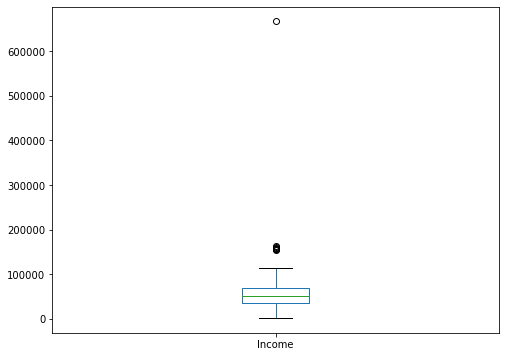

In [458]:
dfCustomers['Income'].plot(kind='box', figsize=(8, 6))

**Dropando os Outiliers**

In [459]:
dfCustomersOutilier = dfCustomers[dfCustomers['Income']>600000]
dfCustomersOutilier

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,1,3,6,0,0,0,0,0,0,0


In [460]:
dfCustomers = dfCustomers[dfCustomers['Income']<600000]
dfCustomers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


<AxesSubplot:>

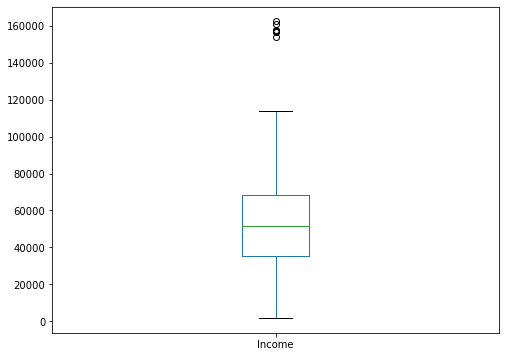

In [461]:
dfCustomers['Income'].plot(kind='box', figsize=(8, 6))

**Verificando Variáveis**

In [462]:
dfCustomers['Education'].value_counts()

Graduation    1115
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [463]:
dfCustomers['Marital_Status'].value_counts()

Married     857
Together    572
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

**Irei dropar os valores status (Alone,Absurd e YOLO)**

In [464]:
dfCustomersuknownmarital = dfCustomers[(dfCustomers['Marital_Status']=="Alone") | (dfCustomers['Marital_Status']=="Absurd") | (dfCustomers['Marital_Status']=="YOLO")]
dfCustomersuknownmarital

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
131,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,...,1,6,8,0,0,0,0,0,0,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,...,1,2,5,1,0,0,0,0,0,1
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,...,0,4,6,0,0,0,0,0,0,0
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,5,6,2,0,0,0,0,0,0,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,1


In [465]:
dfCustomers.drop(dfCustomersuknownmarital.index, inplace = True)
dfCustomers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [466]:
dfCustomers['Dt_Customer']=pd.to_datetime(dfCustomers['Dt_Customer'], format='%Y-%m-%d')

In [467]:
dfCustomers.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response    

#### **Irei criar duas colunas no dataframe (custdays: Número de dias que o cliente possui cadastro (até 23/03/2021) e Age: Idade do cliente no ano de 2021)**

In [468]:
from datetime import datetime

In [469]:
hoje = '2020-11-17' # data de publicação do bd para análise.
hoje=datetime.strptime(hoje,'%Y-%m-%d')

In [470]:
(hoje - dfCustomers['Dt_Customer'])

0      2996 days
1      2446 days
2      2645 days
3      2472 days
4      2494 days
          ...   
2235   2714 days
2236   2352 days
2237   2488 days
2238   2489 days
2239   2955 days
Name: Dt_Customer, Length: 2208, dtype: timedelta64[ns]

In [471]:
dfCustomers['custdays'] = (hoje - dfCustomers['Dt_Customer']).dt.days

In [472]:
dfCustomers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,custdays
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,2996
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,2446
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,2645
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,2472
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,2494


In [473]:
#(hoje_age - dfCustomers['Year_Birth'])

In [474]:
dfCustomers['Age'] = (2021 - dfCustomers['Year_Birth'])
dfCustomers[['Age']].sort_values(by=['Age'], ascending=False)

,Age
239,128
339,122
192,121
1950,81
424,80
...,...
1850,26
696,26
2213,26
46,25


In [475]:
dfCustomersAge = dfCustomers.sort_values(by=['Year_Birth'], ascending=True).head()
dfCustomersAge

#Anos de nascimento com erro de digitação ( 1893/1899 e 1900)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,custdays,Age
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,0,2376,128
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,0,2609,122
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,1,0,2609,121
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,5,0,0,0,0,0,0,0,2689,81
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,2,0,0,1,0,0,0,0,2775,80


In [476]:
dfCustomers.drop(index = [239,339,192], inplace=True) 
dfCustomers.sort_values(by=['Year_Birth'], ascending=True).head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,custdays,Age
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,5,0,0,0,0,0,0,0,2689,81
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,2,0,0,1,0,0,0,0,2775,80
358,6142,1943,Master,Married,65073.0,0,0,2013-08-20,65,629,...,2,0,0,0,0,0,1,0,2646,78
1150,1453,1943,PhD,Widow,57513.0,0,0,2013-07-06,59,735,...,6,0,0,0,0,0,0,0,2691,78
415,7106,1943,PhD,Married,75865.0,0,0,2014-03-31,73,483,...,1,0,0,0,0,0,0,0,2423,78


In [477]:
dfCustomers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,custdays,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,1,2996,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,0,2446,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,2645,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,0,2472,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,2494,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,0,2714,54
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,0,2352,75
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,0,2488,40
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,0,2489,65


### Iremos verificar a correlação 

In [500]:
dfCustomers.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,custdays,Age
ID,1.000000,0.004777,0.000541,0.002381,-0.003782,-0.045373,-0.019096,0.009121,-0.004048,-0.023567,...,-0.007368,-0.037264,-0.024043,-0.005906,-0.019589,-0.015059,0.031829,-0.025505,-0.002064,-0.004777
Year_Birth,0.004777,1.000000,-0.200479,0.238467,-0.362090,-0.014641,-0.164524,-0.014376,-0.032337,-0.042798,...,0.121737,0.061154,-0.069831,0.015875,-0.015494,-0.007689,-0.004491,0.018088,0.014124,-1.000000
Income,0.000541,-0.200479,1.000000,-0.514502,0.035352,0.007008,0.688130,0.506709,0.692684,0.519915,...,-0.650649,-0.013855,0.219889,0.394909,0.326602,0.104144,-0.027904,0.161792,-0.025168,0.200479
Kidhome,0.002381,0.238467,-0.514502,1.000000,-0.039604,0.010483,-0.497476,-0.372848,-0.439038,-0.388376,...,0.447813,0.014376,-0.162372,-0.204056,-0.173586,-0.082032,0.037110,-0.077582,-0.053314,-0.238467
Teenhome,-0.003782,-0.362090,0.035352,-0.039604,1.000000,0.015592,0.003737,-0.174386,-0.260498,-0.202977,...,0.128900,-0.044451,0.038332,-0.189212,-0.144065,-0.015609,0.007793,-0.156195,0.017336,0.362090
Recency,-0.045373,-0.014641,0.007008,0.010483,0.015592,1.000000,0.015409,-0.006837,0.021705,-0.000886,...,-0.016951,-0.032405,0.016928,-0.000923,-0.022402,-0.001690,0.005512,-0.200004,0.026417,0.014641
MntWines,-0.019096,-0.164524,0.688130,-0.497476,0.003737,0.015409,1.000000,0.385999,0.568712,0.398387,...,-0.322476,0.062982,0.373502,0.473608,0.351999,0.206384,-0.036469,0.247714,0.166570,0.164524
MntFruits,0.009121,-0.014376,0.506709,-0.372848,-0.174386,-0.006837,0.385999,1.000000,0.546729,0.591780,...,-0.416121,0.015869,0.006617,0.206597,0.189827,-0.009935,-0.002957,0.122859,0.067996,0.014376
MntMeatProducts,-0.004048,-0.032337,0.692684,-0.439038,-0.260498,0.021705,0.568712,0.546729,1.000000,0.573712,...,-0.539157,0.019511,0.091562,0.376839,0.314884,0.043503,-0.021106,0.240630,0.090282,0.032337
MntFishProducts,-0.023567,-0.042798,0.519915,-0.388376,-0.202977,-0.000886,0.398387,0.591780,0.573712,1.000000,...,-0.443744,0.001210,0.016555,0.191122,0.258299,0.002507,-0.019046,0.107206,0.082291,0.042798


<AxesSubplot:>

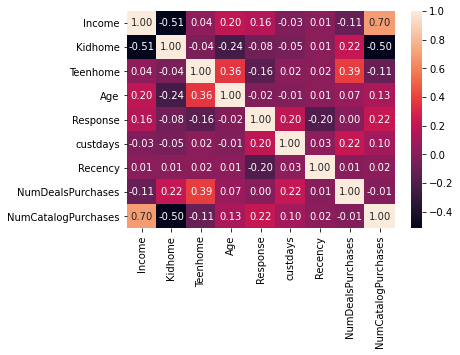

In [511]:
sns.heatmap(dfCustomers[['Education','Marital_Status','Income','Kidhome','Teenhome','Age','Response','custdays','Recency','NumDealsPurchases','NumCatalogPurchases']].corr(),annot=True,fmt='.2f')

<AxesSubplot:>

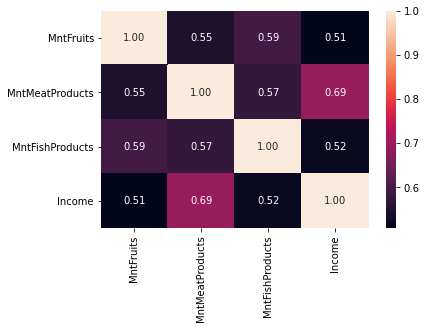

In [512]:
sns.heatmap(dfCustomers[['MntFruits','MntMeatProducts','MntFishProducts','Income']].corr(),annot=True,fmt='.2f')

<Figure size 1440x360 with 0 Axes>

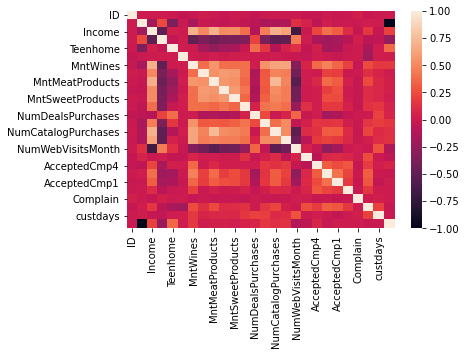

<Figure size 1440x360 with 0 Axes>

In [484]:
sns.heatmap(dfCustomers.corr())
plt.figure(figsize=(20,5))

<AxesSubplot:xlabel='Kidhome', ylabel='Income'>

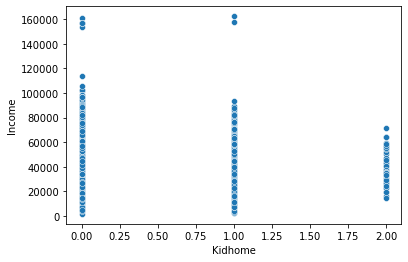

In [486]:
sns.scatterplot(x='Kidhome' , y='Income', data=dfCustomers)

<AxesSubplot:xlabel='Education', ylabel='Income'>

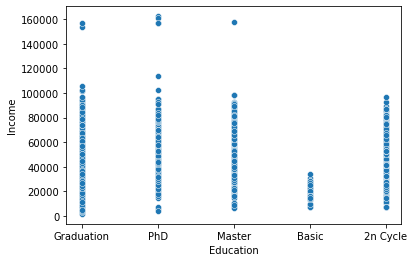

In [487]:
sns.scatterplot(x='Education' , y='Income', data=dfCustomers)

Verificamos que as pessoas podem aceitar mais de uma campanha, onde, mais de mil pessoas não aceitaram nenhuma das campanhas e ninguém aceitou todas as seis campanhas.


In [515]:
dfCustomers[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1).value_counts()

0    1604
1     367
2     138
3      50
4      36
5      10
dtype: int64

### Iremos verificar o número de clientes que aceitaram cada uma das campanhas

In [516]:
dfCustomers[['Response']].sum(axis=1).value_counts()

0    1875
1     330
dtype: int64

In [518]:
#criamos uma função para verificar quantos clientes aceitaram cada uma das campanhas
def camp_results(column): 
    x = dfCustomers[column].value_counts()
    return x
    

In [521]:
#lista de colunas que queremos verificar
lista = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

In [526]:
for i in lista:
    print(camp_results(i),'\n')
     

0    2064
1     141
Name: AcceptedCmp1, dtype: int64 

0    2175
1      30
Name: AcceptedCmp2, dtype: int64 

0    2043
1     162
Name: AcceptedCmp3, dtype: int64 

0    2041
1     164
Name: AcceptedCmp4, dtype: int64 

0    2045
1     160
Name: AcceptedCmp5, dtype: int64 

0    1875
1     330
Name: Response, dtype: int64 



In [534]:
#dataframe com os clientes que aceitaram a última campanha 
dfCustomers1 = dfCustomers[dfCustomers['Response'] == 1] 
dfCustomers1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,custdays,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,1,2996,64
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,1,2721,47
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,1,2915,75
33,7373,1952,PhD,Divorced,46610.0,0,2,2012-10-29,8,96,...,6,0,0,0,0,0,0,1,2941,69
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,6,1,0,0,0,0,0,1,2846,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,...,3,1,0,0,1,0,0,1,2933,64
2194,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,...,6,1,0,0,0,0,0,1,3030,64
2198,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,...,6,1,0,0,0,0,0,1,2709,67
2221,7366,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,...,1,0,1,1,0,0,0,1,2693,39


In [530]:
#criamos uma função para verificar quantos clientes aceitaram a campanha response e as demais
def camp_response(column): 
    x = dfCustomers1[column].value_counts()
    return x

In [532]:
for i in lista:
    print(camp_response(i),'\n')
    

0    252
1     78
Name: AcceptedCmp1, dtype: int64 

0    310
1     20
Name: AcceptedCmp2, dtype: int64 

0    254
1     76
Name: AcceptedCmp3, dtype: int64 

0    268
1     62
Name: AcceptedCmp4, dtype: int64 

0    240
1     90
Name: AcceptedCmp5, dtype: int64 

1    330
Name: Response, dtype: int64 



In [593]:
dfCamp = dfCustomers1[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']] 
dfCamp.loc['Total']= dfCamp.sum()
dfCamp
#dfCamp2 = dfCamp[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']] 
#dfCamp2

C:\Users\maxwe\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,0,0,0,0,1
8,0,0,0,0,0,1
15,1,0,0,0,1,1
33,0,0,0,0,0,1
39,0,0,1,0,0,1
...,...,...,...,...,...,...
2194,0,0,1,0,0,1
2198,0,0,1,0,0,1
2221,0,0,0,1,1,1
2239,0,0,0,0,0,1


In [594]:
dfCamp_Ac1 = dfCamp.groupby('AcceptedCmp1').size()

<AxesSubplot:xlabel='AcceptedCmp1'>

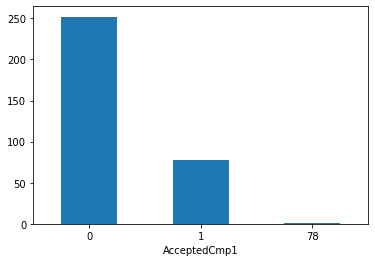

In [595]:
dfCamp_Ac1.plot.bar(rot=0)